<a href="https://colab.research.google.com/github/midounai/titanic-analysis/blob/main/Day01_%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_01%EF%BC%9A%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
# 上傳CSV
uploaded = files.upload()


Saving test.csv to test.csv


In [ ]:
import io
df_train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df_test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [ ]:
df_trainneed=df_train[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]

In [ ]:
df_trainok=pd.get_dummies(df_trainneed,columns=['Sex'])
df_testok=pd.get_dummies(df_test,columns=['Sex'])

In [ ]:
df_trainok=df_trainok.fillna(df_trainok.mean())

In [ ]:
df_trainok.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_trainok.values[:,:])

In [ ]:
df_Xscaled = pd.DataFrame(X_scaled,columns=['Survived','Pclass','Age','SibSp','Parch','Fare','Sex_female','Sex_male'])

In [ ]:
df_Xscaled

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0.0,1.0,0.271174,0.125,0.000000,0.014151,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.000000,0.139136,1.0,0.0
2,1.0,1.0,0.321438,0.000,0.000000,0.015469,1.0,0.0
3,1.0,0.0,0.434531,0.125,0.000000,0.103644,1.0,0.0
4,0.0,1.0,0.434531,0.000,0.000000,0.015713,0.0,1.0
...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.334004,0.000,0.000000,0.025374,0.0,1.0
887,1.0,0.0,0.233476,0.000,0.000000,0.058556,1.0,0.0
888,0.0,1.0,0.367921,0.125,0.333333,0.045771,1.0,0.0
889,1.0,0.0,0.321438,0.000,0.000000,0.058556,0.0,1.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cor=df_trainok.corr()

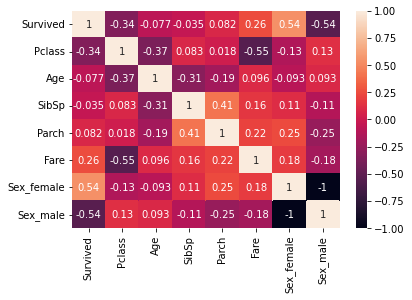

In [ ]:
sns.heatmap(cor,annot=True)

In [ ]:
columns_X = set(df_Xscaled.columns) - {'Survived'}
columns_y = ['Survived']

train_X = df_Xscaled[columns_X]
train_y = df_Xscaled[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
scores

array([0.79329609, 0.79213483, 0.7752809 , 0.75842697, 0.81460674])